Thinkful Prep Course

Author: Sean Lamont

Mentor: Ilyas Ustun

Date: 2017/09/19

In [552]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
from IPython.display import display, HTML

## Company ABC 

The startup world is dominated by Tech companies. According to the Business Dynamic Statistics (BDS) database 
compiled by the United States Census Bureau there are close to ~900K tech startups in the United States alone. ABC is
trying to break into this world with an app based service model. They provide service in multiple cities with the goal
of being a national brand leader. 

This data set is based on customer sales for ABC. The goal of this project is to determine the answers to the 
following questions:

    Is the company growing month over month?
    Where does the majority of ABC's business come from? One time customers or loyal returning customers?
    Which customers book the most services?
    Do the customers that book the most also generate the most revenue?
    How does booking revenue correlate to booking volume?

### Data Description

The data was pulled from the SQL database for the company using a CSV download. The data spans almost two years time and is organically generated off of sales.

In [553]:
df = pd.read_csv('9.14.17 Transactions.csv')
df.shape
df.head(5)

,TransactionId,CustomerId,ServiceId,ServiceProviderId,NoofPetsWalk,OrderDate,Notes,Price,ServiceDate,ServiceTime,...,OnTheWay,ClockedIn,ClockedOut,CancellationDate,ServiceProviderCompany,SPApproved,DiscountValue,CouponID,TaxRate,Tax
0,2,1593,3,5096,1,2017-02-08 00:00:00,This is Ashfaq - for testing only.,0.00,2016-08-18,12p to 3p,...,NaN,NaN,NaN,NaN,7,1,0.0,0.0,8.25,14.025
1,864,473,11,2,0,2015-12-11 00:00:00,NaN,92.01,2015-12-15,9a to 5p,...,NaN,NaN,NaN,NaN,2,1,NaN,0.0,NaN,NaN
2,865,458,21,0,1,2015-12-11 00:00:00,Instructions will be left on dining room table.,9.00,2015-12-22,10a to 1p,...,NaN,NaN,NaN,NaN,1,1,NaN,0.0,NaN,NaN
3,866,458,21,0,1,2015-12-11 00:00:00,Instructions will be left on dining room table.,9.00,2015-12-24,12p to 3p,...,NaN,NaN,NaN,NaN,1,1,NaN,0.0,NaN,NaN
4,867,458,21,0,1,2015-12-11 00:00:00,Instructions will be left on dining room table.,9.00,2015-12-29,12p to 3p,...,NaN,NaN,NaN,NaN,1,1,NaN,0.0,NaN,NaN


In [554]:
customer = df[['CustomerId','ServiceId']].groupby('CustomerId').agg('count')
customer.sort_values(['ServiceId'], ascending=[0]).head(5)

,ServiceId
CustomerId,
671,176
1872,137
661,137
5198,130
1060,130


In [555]:
df['ServiceDate'] = pd.to_datetime(df['ServiceDate'])
g = df.ServiceDate.dt.to_period("M")
g2 = df.groupby(g)
months = g2.count()[['TransactionId']]
months['ServiceMonth'] = months.index
months

,TransactionId,ServiceMonth
ServiceDate,,
2015-12,7,2015-12
2016-01,5,2016-01
2016-02,1,2016-02
2016-03,13,2016-03
2016-04,13,2016-04
2016-05,12,2016-05
2016-06,46,2016-06
2016-07,77,2016-07
2016-08,118,2016-08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

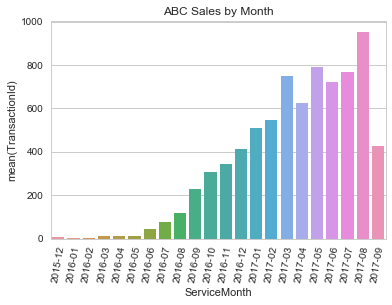

In [556]:
sns.set_style("whitegrid")
sns.barplot(data = months, x = 'ServiceMonth', y = 'TransactionId')
plt.title('ABC Sales by Month')
plt.xticks(rotation=80)

It appears that sales have been growing quickly for ABC starting in June of 2016. March, May and August of 2017
were months where the business expereienced major growth. September looks to be slightly behind pace of August at the
time that this data was pulled. It is worthwhile to note that the data was pulled halfway through the month, on
September 14th, so there are still 13 more business days left in the month.

In [557]:
customer = trn_df[['CustomerId','ServiceId']].groupby('CustomerId').agg('count')
ccohort = customer.groupby(pd.cut(customer["ServiceId"], np.arange(0,200,20))).count()
ccohort['cohort'] = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180']
ccohort

,ServiceId,cohort
ServiceId,,
"(0, 20]",1426,0-20
"(20, 40]",39,20-40
"(40, 60]",7,40-60
"(60, 80]",6,60-80
"(80, 100]",4,80-100
"(100, 120]",2,100-120
"(120, 140]",5,120-140
"(140, 160]",0,140-160
"(160, 180]",1,160-180


(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.]), <a list of 9 Text xticklabel objects>)

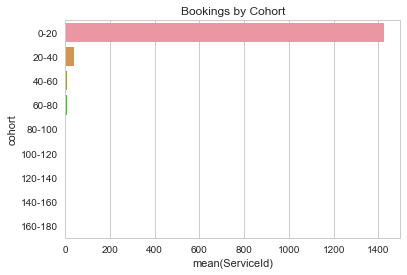

In [558]:
sns.set_style("whitegrid")
sns.barplot(data = ccohort, x = 'ServiceId', y = 'cohort')
plt.title('Bookings by Cohort')
plt.xticks()

It appears that the majority of the customers for ABC have booked inbetween 0 and 20 times. Overall, let's look at how
many customers are repeat customers vs one-time customers.

In [559]:
single_customer_cohort = customer.groupby(pd.cut(customer["ServiceId"], np.arange(0,2,1))).count()
single_customer_cohort

,ServiceId
ServiceId,
"(0, 1]",690


In [560]:
one_time_cust_percent = single_customer_cohort/ccohort['ServiceId'].sum()
one_time_cust_percent

,ServiceId
ServiceId,
"(0, 1]",0.463087


Almost half, 46.3% of ABC's business is generated by one time customers. Now let's take a look at their best customers by the number of times they have ordered.

In [561]:
top_ten = customer.sort_values(['ServiceId'], ascending=[0]).head(10)
top_ten

,ServiceId
CustomerId,
671,176
1872,137
661,137
5198,130
1060,130
5748,122
1941,112
5115,106
905,95


Number of orders is a good leading indicator of your most valuable customers. That said, there are considerable gaps
in the price for different types of services provided by ABC. Let's look at the top ten customers relative to the 
revenue that they have generated for the business.

In [562]:
top_ten_rev = df[['CustomerId','Price']].groupby('CustomerId').agg('sum')
top_ten_rev.sort_values(['Price'], ascending=[0]).head(10)

,Price
CustomerId,
1179,4172.22
637,3713.09
5115,3362.45
661,3165.13
1340,3090.57
671,3020.87
1852,3004.40
1941,2983.02
905,2830.56


Customers 1872, 5198, 1060, 5748, 1029, are all in the Top 10 for order vlume but are not in the Top 10 revenue
category. They are very valuable customers, just not the most valuable customers. The customers that replace them are
customers 1179, 1340, 637, 1852, and 5381. Those customers make up a significant amount of revenue for the business.
Lastly, customers 671, 661, 1941, 905 and 5115 are in both categories. Their order volume is in the Top 10 and 
generate Top 10 caliber revenue. Something that ABC could do with this information is communicating with those 
customers and offering them a coupon for their loyalty. Additionally, they could encourage the customers that order 
frequently to try other, more expensive service lines that have the potential to put them in the Top 10 category for 
revenue generation.

In [563]:
customers2 = df.groupby('CustomerId')['Price'].agg(['count','sum'])
customers2['CustomersId'] = customers2.index
customers2.sort_values(['sum'], ascending=[0]).head(10)

,count,sum,CustomersId
CustomerId,,,
1179,39,4172.22,1179
637,46,3713.09,637
5115,106,3362.45,5115
661,137,3165.13,661
1340,21,3090.57,1340
671,176,3020.87,671
1852,51,3004.40,1852
1941,112,2983.02,1941
905,95,2830.56,905


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

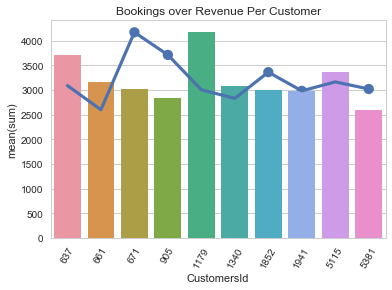

In [564]:
sns.set_style("whitegrid")
sns.pointplot( x = 'count', y = 'sum',data = customers2.sort_values(['sum'], ascending=[0]).head(10))
sns.barplot(data = customers2.sort_values(['sum'], ascending=[0]).head(10), x = 'CustomersId', y = 'sum')
plt.title('Bookings over Revenue Per Customer')
plt.xticks(rotation = 60)

This visualization shows the stark difference in order volume and revenue that is generated by customer. It is valuable insight into the actual spending habits of these customers.

# Takeaways

The information that was gathered above provides valuable insights for ABC. The team can take this information and make decisions about where to spend marketing money based on it. There are certainly further learnings to be had when looking at this data set.